Before running this notebook, it's helpful to 

`conda install -c conda-forge nb_conda_kernels`

`conda install -c conda-forge ipywidgets`

and set the kernel to the conda environment in which you installed glmtools (typically, `glmval`)

In [1]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from glmtools.io.glm import GLMDataset

## Use a sample data file included in glmtools

In [2]:

from glmtools.test.common import get_sample_data_path

sample_path = get_sample_data_path()
samples = [
    "OR_GLM-L2-LCFA_G16_s20181830433000_e20181830433200_c20181830433231.nc",
    "OR_GLM-L2-LCFA_G16_s20181830433200_e20181830433400_c20181830433424.nc",
    "OR_GLM-L2-LCFA_G16_s20181830433400_e20181830434000_c20181830434029.nc",
]
samples = [os.path.join(sample_path, s) for s in samples]
filename = samples[0]

## Use data from the most recent minute or two

Requires siphon.

To load data via siphon from opendap, you must

`conda install -c conda-forge siphon`

In [3]:
# Load data from the most recent minute or two!
if False:
    from siphon.catalog import TDSCatalog
    g16url = "http://thredds-test.unidata.ucar.edu/thredds/catalog/satellite/goes16/GRB16/GLM/LCFA/current/catalog.xml"
    satcat = TDSCatalog(g16url)
    filename = satcat.datasets[-1].access_urls['OPENDAP']

## Load the data

In [4]:
glm = GLMDataset(filename)
print(glm.dataset)

<xarray.Dataset>
Dimensions:                                 (number_of_events: 18361, number_of_field_of_view_bounds: 2, number_of_flashes: 302, number_of_groups: 7182, number_of_time_bounds: 2, number_of_wavelength_bounds: 2)
Coordinates:
  * number_of_flashes                       (number_of_flashes) MultiIndex
  - flash_id                                (number_of_flashes) int64 44444 ...
  - flash_time_offset_of_first_event        (number_of_flashes) datetime64[ns] 2018-07-02T04:32:59.270000 ...
  - flash_time_offset_of_last_event         (number_of_flashes) datetime64[ns] 2018-07-02T04:32:59.768000 ...
  - flash_lat                               (number_of_flashes) float64 -32.08 ...
  - flash_lon                               (number_of_flashes) float64 -57.73 ...
  * number_of_groups                        (number_of_groups) MultiIndex
  - group_parent_flash_id                   (number_of_groups) int64 44444 ...
  - group_id                                (number_of_groups) in

## Flip through each flash, plotting each.

Event centroids are small black squares.

Group centroids are white circles, colored by group energy.

Flash centroids are red 'x's

<function __main__.do_plot>

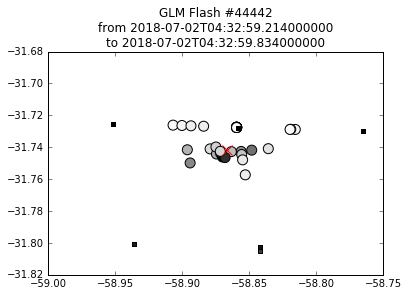

In [5]:
from glmtools.plot.locations import plot_flash

import ipywidgets as widgets
# print(widgets.Widget.widget_types.values())
fl_id_vals = list(glm.dataset.flash_id.data)
fl_id_vals.sort()
flash_slider =  widgets.SelectionSlider(
    description='Flash',
    options=fl_id_vals,
)

def do_plot(flash_id):
    fig = plot_flash(glm, flash_id)
widgets.interact(do_plot, flash_id=flash_slider)

# Find flashes in some location

There are hundreds of flashes to browse above, and they are randomly scattered across the full disk. Storms near Lubbock, TX at the time of sample data file had relatively low flash rates, so let's find those.

In [6]:
flashes_subset = glm.subset_flashes(lon_range = (-102.5, -100.5), lat_range = (32.5, 34.5))
print(flashes_subset)

<xarray.Dataset>
Dimensions:                                 (number_of_events: 263, number_of_field_of_view_bounds: 2, number_of_flashes: 6, number_of_groups: 115, number_of_time_bounds: 2, number_of_wavelength_bounds: 2)
Coordinates:
  * number_of_flashes                       (number_of_flashes) MultiIndex
  - flash_id                                (number_of_flashes) int64 44462 ...
  - flash_time_offset_of_first_event        (number_of_flashes) datetime64[ns] 2018-07-02T04:32:59.942000 ...
  - flash_time_offset_of_last_event         (number_of_flashes) datetime64[ns] 2018-07-02T04:33:00.172000 ...
  - flash_lat                               (number_of_flashes) float64 32.74 ...
  - flash_lon                               (number_of_flashes) float64 -100.9 ...
  * number_of_groups                        (number_of_groups) MultiIndex
  - group_parent_flash_id                   (number_of_groups) int64 44462 ...
  - group_id                                (number_of_groups) int64 48

<function __main__.do_plot>

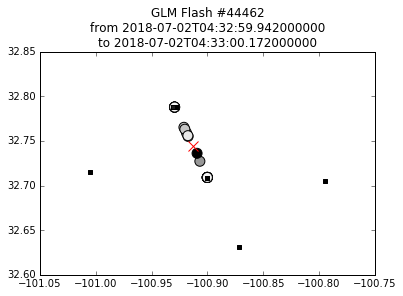

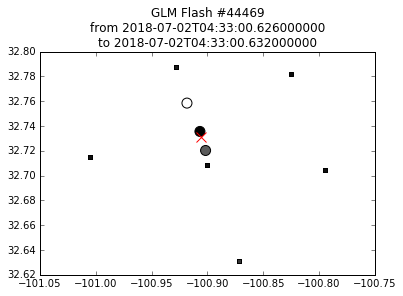

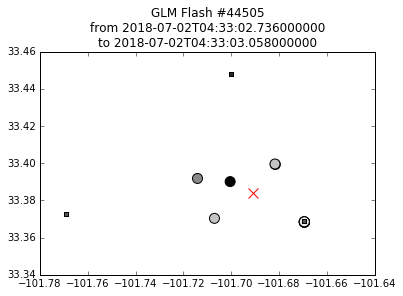

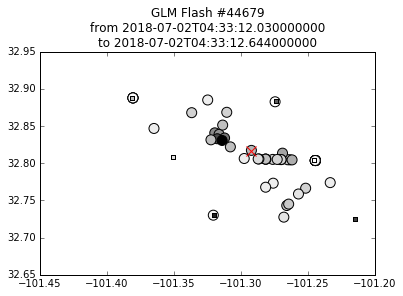

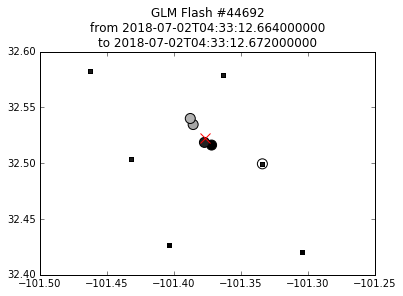

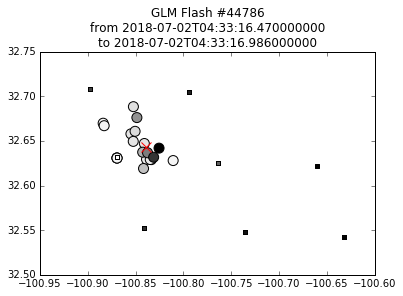

In [7]:
from glmtools.plot.locations import plot_flash

import ipywidgets as widgets
# print(widgets.Widget.widget_types.values())
fl_id_vals = list(flashes_subset.flash_id.data)
fl_id_vals.sort()
flash_slider =  widgets.SelectionSlider(
    description='Flash',
    options=fl_id_vals,
)

# from functools import partial
# glm_plotter = partial(plot_flash, glm) # fails with a __name__ attr not found
def do_plot(flash_id):
    fig = plot_flash(glm, flash_id)
widgets.interact(do_plot, flash_id=flash_slider)